<a href="https://colab.research.google.com/github/odu-cs625-datavis/fall23-mcw-maazhasnainkhan/blob/main/HW5/CS_625_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 625 HW3**

## **Table 12 - Resident Population--States**

### **Part 1**

Boxplot: Show the distributions of the population of all states in 1980, 2000 (either April or July), and 2008.

This should result in 3 separate boxplot glyphs in a single chart

Mounted at /content/drive


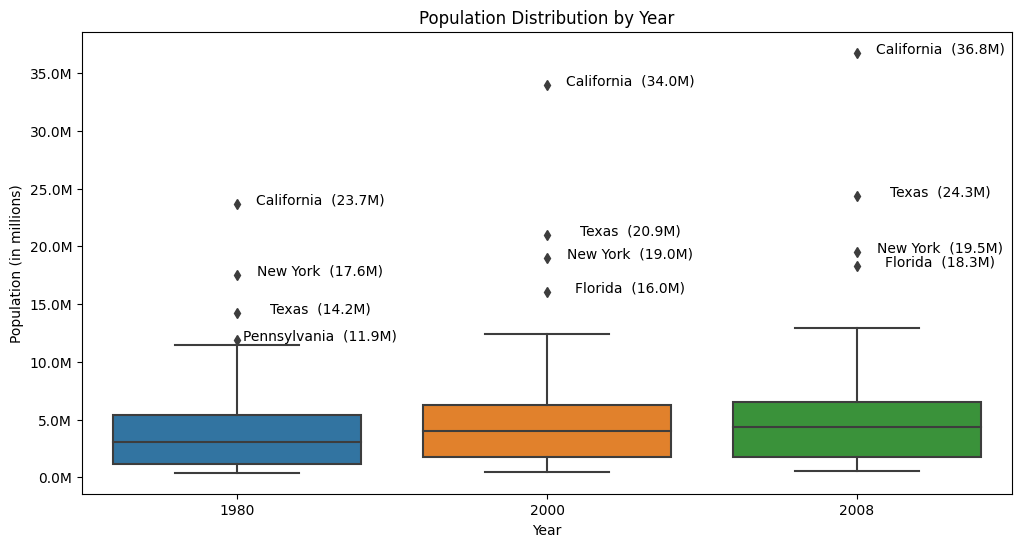

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from matplotlib.ticker import FuncFormatter

drive.mount("/content/drive", force_remount=True)
data = pd.read_csv("/content/drive/MyDrive/CS_625/CS_625_HW5/dataset1-boxplot-csv.csv")

pop_1980 = data['1980']
pop_2000 = data['2000']
pop_2008 = data['2008']
states = data['State']
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

plt.figure(figsize=(12, 6))
sns.boxplot(data=[pop_1980, pop_2000, pop_2008])
plt.title("Population Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Population (in millions)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.xticks([0, 1, 2], ['1980', '2000', '2008'])

outliers = {}
for i, data_series in enumerate([pop_1980, pop_2000, pop_2008]):
    quartile_1 = data_series.quantile(0.25)
    quartile_3 = data_series.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr
    data_series_outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
    outliers[i] = data_series_outliers

for i, year in enumerate(['1980', '2000', '2008']):
    for outlier in outliers[i]:
        state_name = states[data[year] == outlier].values[0]
        population_value = data[year][data['State'] == state_name].values[0]
        plt.annotate(f"{state_name} ({millions(population_value, 0)})", (i, outlier), textcoords='offset points', xytext=(60, 0), ha='center')

plt.show()


eCDF and histogram: Show the distribution of the population of all states in one of the years (your chart title must indicate which year).

Your histogram should use a reasonable bin size for the data

Mounted at /content/drive


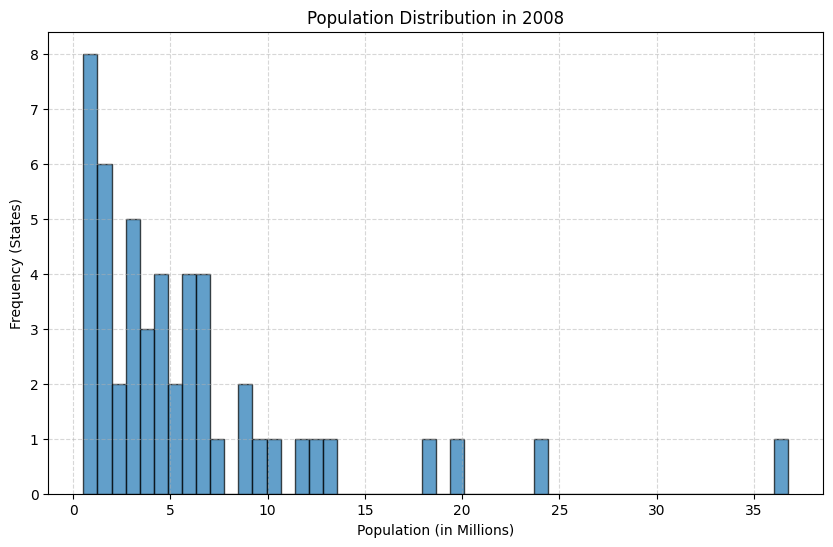

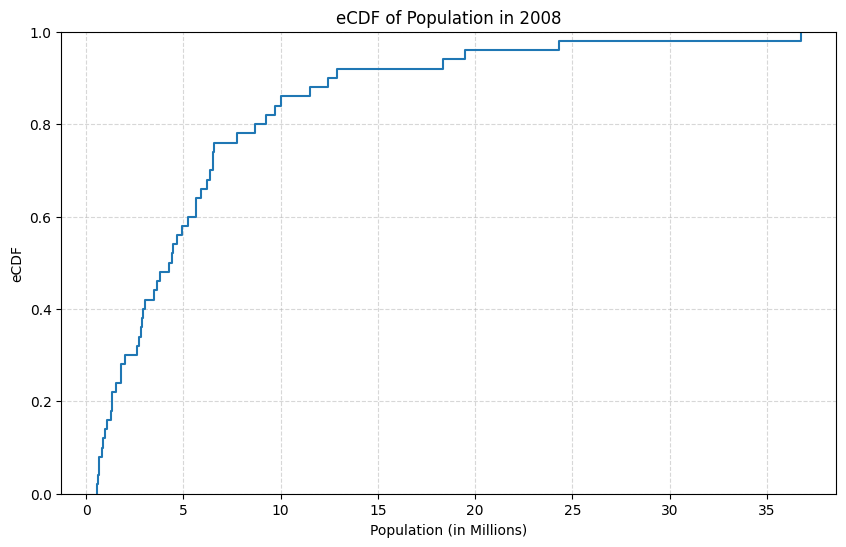

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
data = pd.read_csv("/content/drive/MyDrive/CS_625/CS_625_HW5/dataset1-boxplot-csv.csv")

pop_2008 = data['2008'] / 1e6

plt.figure(figsize=(10, 6))
plt.hist(pop_2008, bins=50, edgecolor='k', alpha=0.7)
plt.title("Population Distribution in 2008")
plt.xlabel("Population (in Millions)")
plt.ylabel("Frequency (States)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))
sns.ecdfplot(pop_2008, marker='', linestyle='-')
plt.title("eCDF of Population in 2008")
plt.xlabel("Population (in Millions)")
plt.ylabel("eCDF")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Part 2**

Use the charts that you created in Part 1 to guide further investigation of the data. I expect to see additional charts created in this part. This could be other types of charts that reveal something interesting.

State at least 2 interesting findings about the data and explain how you used one or more of the distribution charts to guide the investigation into this finding. These findings must be something more than a simple observation from the base charts.

Mounted at /content/drive


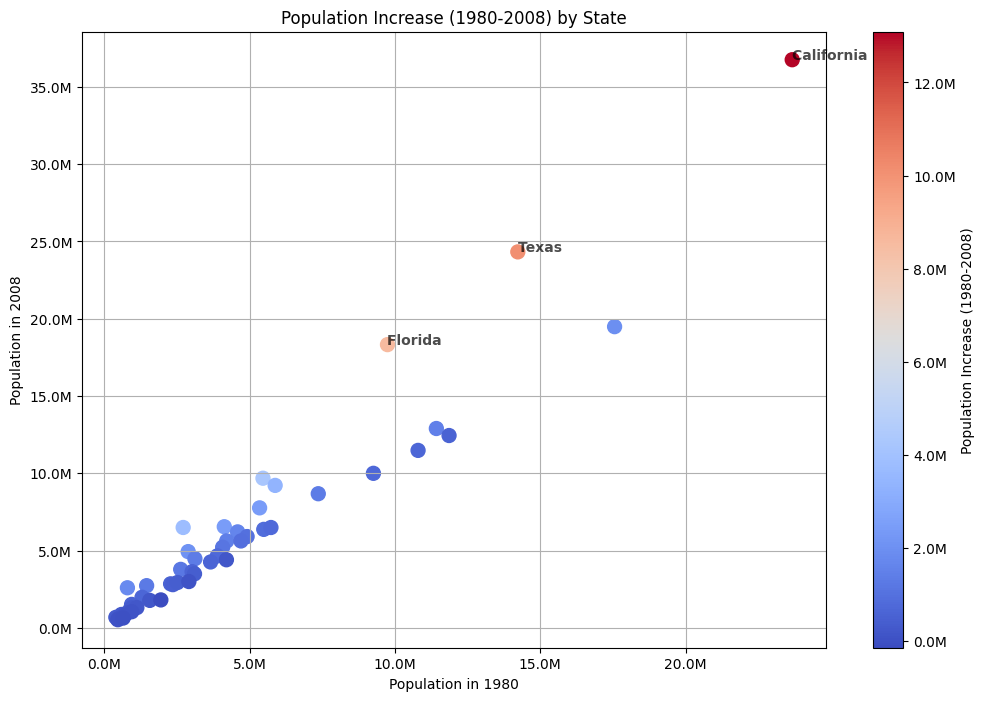

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
data = pd.read_csv("/content/drive/MyDrive/CS_625/CS_625_HW5/dataset1-boxplot-csv.csv")

data['Population Increase'] = data['2008'] - data['1980']

data = data.sort_values(by='Population Increase', ascending=False)

top_states = data.head(3)

def millions(x, pos):
    return f'{x/1e6:.1f}M'

plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['1980'], data['2008'], c=data['Population Increase'], cmap='coolwarm', s=100)
plt.title('Population Increase (1980-2008) by State')
plt.xlabel('Population in 1980')
plt.ylabel('Population in 2008')
plt.grid(True)


cbar = plt.colorbar(scatter, format=FuncFormatter(millions))
cbar.set_label('Population Increase (1980-2008)')

for i, row in top_states.iterrows():
    plt.annotate(row['State'], (row['1980'], row['2008']), fontsize=10, alpha=0.7, weight='bold', color='black')

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))

plt.show()


Mounted at /content/drive


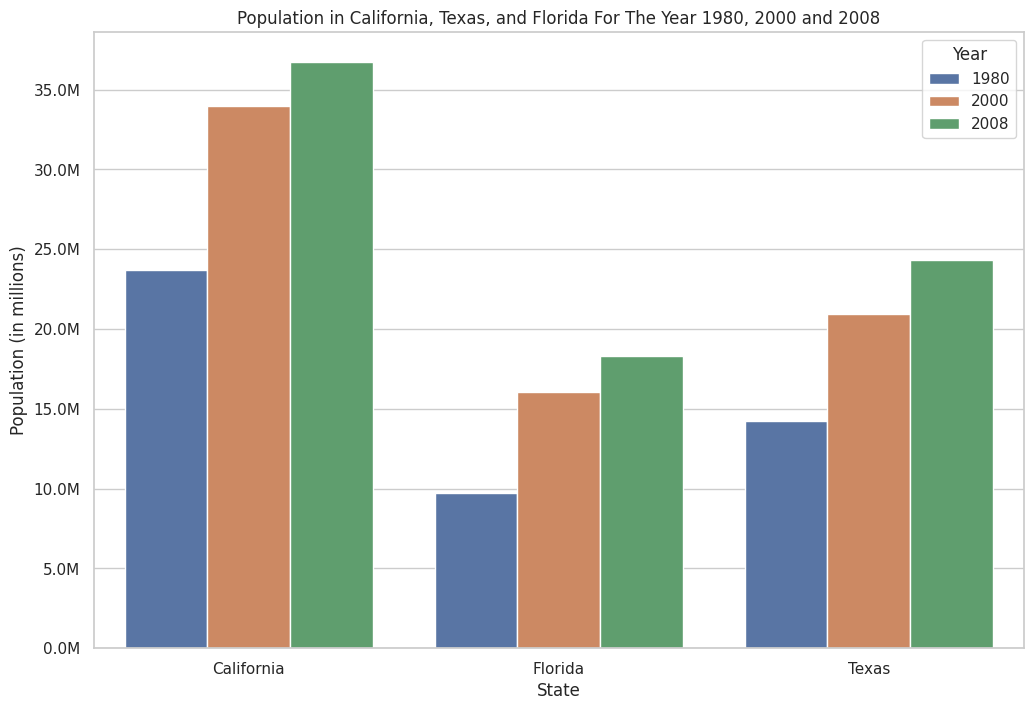

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
data = pd.read_csv("/content/drive/MyDrive/CS_625/CS_625_HW5/dataset1-boxplot-csv.csv")

data['State'] = data['State'].str.strip()

states_to_plot = ['California', 'Texas', 'Florida']
selected_data = data[data['State'].isin(states_to_plot)]

melted_data = selected_data.melt(id_vars=['State'], var_name='Year', value_name='Population')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='State', y='Population', hue='Year', data=melted_data)

plt.title('Population in California, Texas, and Florida For The Year 1980, 2000 and 2008')
plt.xlabel('State')
plt.ylabel('Population (in millions)')

def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

y_formatter = FuncFormatter(millions_formatter)
barplot.yaxis.set_major_formatter(y_formatter)

plt.legend(title='Year')

plt.show()


In [15]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
data = pd.read_csv("/content/drive/MyDrive/CS_625/CS_625_HW5/chloropleth-xlsx.csv")


fig = px.choropleth(
    data,
    locations="State Code",
    color="Population in 2008",
    locationmode="USA-states",
    scope="usa",
    color_continuous_midpoint=21000000,
    title="Population Distribution in 2008 by US State"
)

fig.show()


Mounted at /content/drive


In [16]:
import pandas as pd
import plotly.express as px
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
data = pd.read_csv("/content/drive/MyDrive/CS_625/CS_625_HW5/dataset1_popdensity.csv")

def format_hover_data(state, population, density):
    return f'State: {state}<br>Population: {population / 1e6:.2f}M'

data['CustomHoverData'] = data.apply(lambda row: format_hover_data(row['State'], row['Population in 2008'], row['Population Density in 2008']), axis=1)

fig = px.choropleth(
    data,
    locations="State Code",
    color="Population Density in 2008",
    locationmode="USA-states",
    scope="usa",
    title="Population and Population Density in 2008 by US State",
    color_continuous_midpoint=610,
    hover_data=["State", "CustomHoverData"],
)

fig.show()

Mounted at /content/drive


In [17]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/CS_625/CS_625_HW5/dataset1_popdensity.csv")

data = data.sort_values(by="Population Density in 2008", ascending=False)

top_states = data.head(3)

fig = px.scatter(
    data,
    x="Population in 2008",
    y="Population Density in 2008",
    size="Population in 2008",
    color="Population Density in 2008",
    hover_name="State",
    title="Population, Density, and Area by U.S. State in 2008"
)

for i, row in top_states.iterrows():
    annotation_text = f"{row['State']} ({row['Population Density in 2008']})"
    bold_text = f"<b>{annotation_text}</b>"
    fig.add_annotation(
        x=row["Population in 2008"],
        y=row["Population Density in 2008"],
        text=bold_text,
        showarrow=True,
        arrowhead=4,
        font=dict(size=15)
    )

fig.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
